importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
cs=pd.read_csv('Datasets/Carseats.csv')

In [3]:
cs.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


Performing EDA

In [4]:
#droping Unnamed column 
cs.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
cs.shape

(400, 11)

In [6]:
### there in missing values
cs.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
#there is categorical variables here
cs.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [8]:
#checking categorical values
for col in cs.columns:
    if(cs[col].dtype=='O'):
        print('unique values of {} is {}'.format(col,cs[col].unique()))

unique values of ShelveLoc is ['Bad' 'Good' 'Medium']
unique values of Urban is ['Yes' 'No']
unique values of US is ['Yes' 'No']


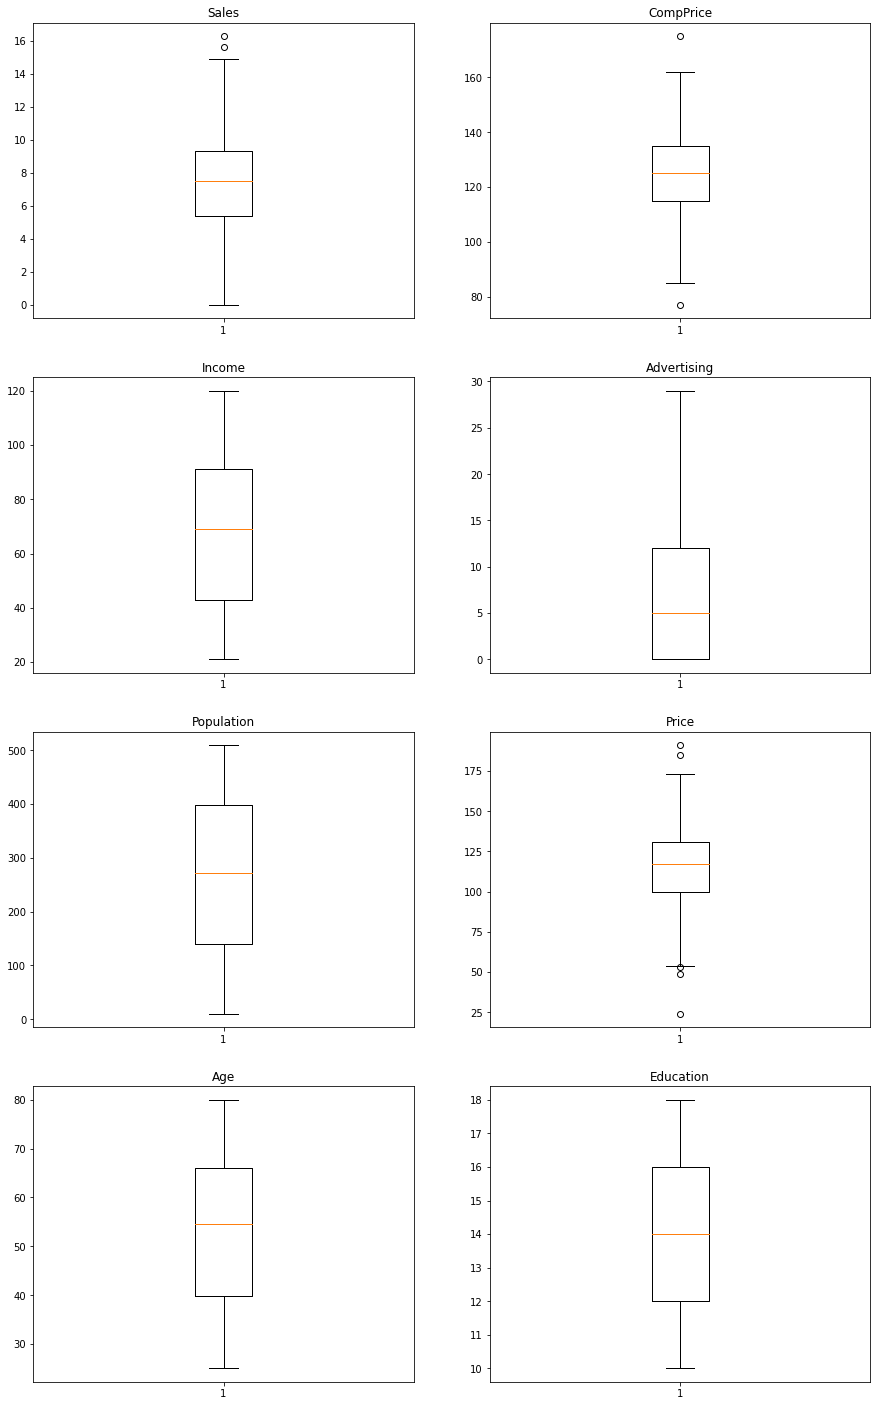

In [9]:
#Detecting outliers
plt.figure(figsize=(15,25))
count=1
for col in cs.columns:
    if(cs[col].dtype!='O'):
        plt.subplot(4,2,count)
        plt.boxplot(cs[col])
        plt.title(col)
        count+=1
plt.show()


In [10]:
#checking correlation
cs.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [11]:
cs.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [12]:
#label encoding
dict1={
    'Bad':0,
    'Medium':1,
    'Good':2
}

In [13]:
cs['ShelveLoc']=cs["ShelveLoc"].map(dict1)

In [14]:
cs.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,Yes,Yes
1,11.22,111,48,16,260,83,2,65,10,Yes,Yes
2,10.06,113,35,10,269,80,1,59,12,Yes,Yes
3,7.40,117,100,4,466,97,1,55,14,Yes,Yes
4,4.15,141,64,3,340,128,0,38,13,Yes,No


In [15]:
#converting categorical into numerical
cs=pd.get_dummies(cs,drop_first=True)

In [16]:
cs.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [17]:
#separating x and y
x=cs.iloc[:,1:].values
y=cs.iloc[:,0].values

In [18]:
x.shape

(400, 10)

In [19]:
y.shape

(400,)

In [20]:
#splitting x and y
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

model building

In [22]:
from sklearn.linear_model import Lasso,Ridge

1.with Ridge regression

In [23]:
model=Ridge(alpha=0.01)

In [24]:
model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [25]:
#prediction
y_pred=model.predict(x_test)

model evaluation

In [26]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,y_pred)

0.8001964086115985

2.Lasso regression

In [28]:
model=Lasso(alpha=0.01)

In [29]:
model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [30]:
#prediction
y_pred=model.predict(x_test)

In [31]:
#model evaluation
r2_score(y_test,y_pred)

0.8020960885883203